# Вежба 6: Регресија со користење на Gradient Boosting

Во оваа вежба ќе работиме со истото податочно множество за предвидување на цената на автомибил како во **Вежба 4: Имплементација на линеарна регресија со scikit-learn**.
Тоа значи дека делот за претпроцесирање и креирање на тренинг и тест множество е идентичен како во Вежба 4.

## Preprocessing

In [1]:
import pandas as pd

print(pd.__version__)

1.4.2


In [2]:
auto_data = pd.read_csv('../Exercises 5 - Datasets/imports-85.data', sep=r'\s*,\s*', engine='python')
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [3]:
import numpy as np

auto_data = auto_data.replace('?', np.nan)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
auto_data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,8921
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [6]:
auto_data['price'].describe()

count      201
unique     186
top       8921
freq         2
Name: price, dtype: object

In [7]:
auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce')
auto_data['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [8]:
auto_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [9]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')
auto_data['horsepower'].describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [10]:
auto_data['num-of-cylinders'].describe()

count      205
unique       7
top       four
freq       159
Name: num-of-cylinders, dtype: object

In [11]:
cylinder_dict = {'two': 2,
                 'three': 3,
                 'four': 4,
                 'five': 5,
                 'six': 6,
                 'eight': 8,
                 'twelve': 12}

auto_data['num-of-cylinders'].replace(cylinder_dict, inplace=True)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500,18,22,17450.0


In [12]:
auto_data = pd.get_dummies(auto_data,
                           columns=['make',
                                    'fuel-type',
                                    'aspiration',
                                    'num-of-doors',
                                    'body-style',
                                    'drive-wheels',
                                    'engine-location',
                                    'engine-type',
                                    'fuel-system'])
auto_data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,NaN,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,NaN,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,NaN,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,0,1,0,0
3,2,164,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,164,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [13]:
auto_data = auto_data.dropna()
auto_data

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
3,2,164,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,164,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0
6,1,158,105.8,192.7,71.4,55.7,2844,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0
8,1,158,105.8,192.7,71.4,55.9,3086,5,131,3.13,...,0,0,0,0,0,0,0,1,0,0
10,2,192,101.2,176.8,64.8,54.3,2395,4,108,3.5,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0
201,-1,95,109.1,188.8,68.8,55.5,3049,4,141,3.78,...,0,0,0,0,0,0,0,1,0,0
202,-1,95,109.1,188.8,68.9,55.5,3012,6,173,3.58,...,1,0,0,0,0,0,0,1,0,0
203,-1,95,109.1,188.8,68.9,55.5,3217,6,145,3.01,...,0,0,0,0,0,1,0,0,0,0


In [14]:
auto_data[auto_data.isnull().any(axis=1)]

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi


In [15]:
from sklearn.model_selection import train_test_split

X = auto_data.drop('price', axis=1)

#taking the labels (price)
Y = auto_data['price']

#spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Gradient Boosting

Наместо да користиме линеарна регресија како во Вежба 4, ќе користиме Gradient Boosting од sklearn.ensemble модулот.
1. Бројот на слаби модели е 500 (n_estimators)
2. Дрвата на одлука да не бидат подлабоки од 6 (max_depth)
3. За да имаме гранање кај еден јазел потребни се минимум 2 примероци (min_sample_split)
3. Како функција на загуба ќе корстиме least square регресија ('loss':'ls').
Со овие параметри го тренираме моделот врз тренинг множеството со повикуваме на методот fit() врз објектот gbr_model. 

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'squared_error'}
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=500)

Добиваме прилично висок вредноста за R2

In [17]:
gbr_model.score(X_train, Y_train)

0.9985936745876929

Да ја видиме точноста на моделот врз тест множеството

In [18]:
y_predict = gbr_model.predict(x_test)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


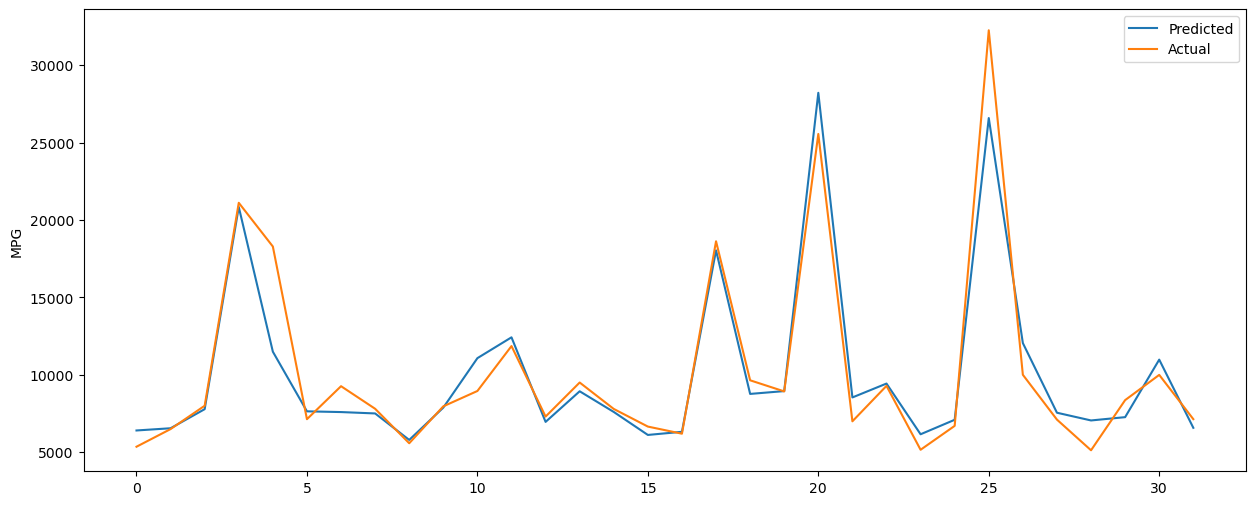

In [19]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('MPG')
plt.legend()
plt.show()

Вредноста за R2 е прилично висока и за тест множеството

In [21]:
r_square = gbr_model.score(x_test, y_test)
r_square

0.9084391617948923

In [24]:
from sklearn.metrics import mean_squared_error

gbr_model_mse = mean_squared_error(y_predict, y_test)
gbr_model_mse

3458416.7935910784

Можеме да ја видиме и грешката која ја правиме при предвидување на цената

In [25]:
import math

math.sqrt(gbr_model_mse)

1859.6819065611942

Gradient Boosting има доста параметри кои маже да се нагодуваат (хипер-тјунираат), тоа го прави добар кандидат за Grid Search за да се најде најдобриот модел.
Она што пробуваме е:
- различен број на слаби модели: num_estimators = [100,200,500]
- различни рати на учење: learn_rates = [0.01,0.02,0.05,0.1]
- различни длабочини на дрво: max_depths = [4,6,8]
Со овие параметри инстанцираме објект од класата GridSearchCV, каде дополнително специфицираме cross-validation да биде 3. Исто така, сакаме за секој пробан модел да имаме резултат колку добро истиот предвидува, тоа го правиме преку параметарот return_train_score=True.
Ова тренирање ќе трае подолго, бидејќи пробуваме модели со различни параметри. На крај како резултат го добиваме најдобриот модел.

In [27]:
from sklearn.model_selection import GridSearchCV

num_estimators = [100, 200, 500, 1000, 2000]
learn_rates = [0.01, 0.015, 0.02, 0.03, 0.05, 0.1]
max_depths = [3, 4, 6, 8]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths}

grid_search = GridSearchCV(GradientBoostingRegressor(min_samples_split=2, loss='squared_error'),
                           param_grid, cv=3, return_train_score=True)
grid_search.fit(X_train, Y_train)

grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}

Ако сакате да ги видите резултатите од секој модел, тогаш го користите следниов код

In [28]:
grid_search.cv_results_

{'mean_fit_time': array([0.05994566, 0.13631105, 0.27624798, 0.54906583, 1.11050057,
        0.06668814, 0.12994297, 0.32809941, 0.65463877, 1.30565222,
        0.08546066, 0.16803527, 0.43152801, 0.85922074, 1.67946919,
        0.10811035, 0.2035025 , 0.51057776, 1.01181881, 1.99623648,
        0.06198414, 0.11506748, 0.27730719, 0.55711993, 1.0920531 ,
        0.06692704, 0.13233225, 0.32788905, 0.63845801, 1.29352252,
        0.09679874, 0.17495108, 0.43612242, 0.8119057 , 1.64519151,
        0.10102558, 0.20308272, 0.5002474 , 1.00673159, 1.9253691 ,
        0.05749504, 0.12136873, 0.2755398 , 0.54555265, 1.1143314 ,
        0.06759135, 0.13416545, 0.32993348, 0.63903801, 1.29850324,
        0.09208496, 0.17486811, 0.42130431, 0.83315134, 1.69279242,
        0.09910997, 0.2040081 , 0.49280183, 1.02802396, 1.84304293,
        0.06284793, 0.10919317, 0.27323945, 0.5603629 , 1.10475747,
        0.06415415, 0.132816  , 0.31481465, 0.63938864, 1.29066761,
        0.08479746, 0.17078066,

Вкупниот број на комбинации е 36 (3x4x3), односно со Grid Search сме креирале 36 модели кои се разликуваат во однос на влезните хипер-параметри. Со следниот код го печатиме рангот на секој од моделите

In [29]:
for i in range(36):
    print('Parameters:', grid_search.cv_results_['params'][i])
    print('Mean Test Score:', grid_search.cv_results_['mean_test_score'][i])
    print('Rank:', grid_search.cv_results_['rank_test_score'][i])
    print()

Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Mean Test Score: 0.6996982284448344
Rank: 118

Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Mean Test Score: 0.8098615789819399
Rank: 55

Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Mean Test Score: 0.8514887500148979
Rank: 17

Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
Mean Test Score: 0.8572210314791833
Rank: 2

Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 2000}
Mean Test Score: 0.852705306423409
Rank: 11

Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}
Mean Test Score: 0.7115084297557037
Rank: 117

Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Mean Test Score: 0.8134106717860498
Rank: 54

Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
Mean Test Score: 0.8322012039233906
Rank: 47

Parameters: {'learning_rate': 0.01, 'max_depth

Сега пробајте да го истренирате моделот за кој што добивте најдобри резултати со Grid Search и видете ги подобрувањата во однос на првиот модел кој што го истрениравме

In [30]:
params = {'n_estimators': 200, 'max_depth': 3, 'min_samples_split': 2, 'learning_rate': 0.05, 'loss': 'squared_error'}
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=200)

In [31]:
y_predict = gbr_model.predict(x_test)

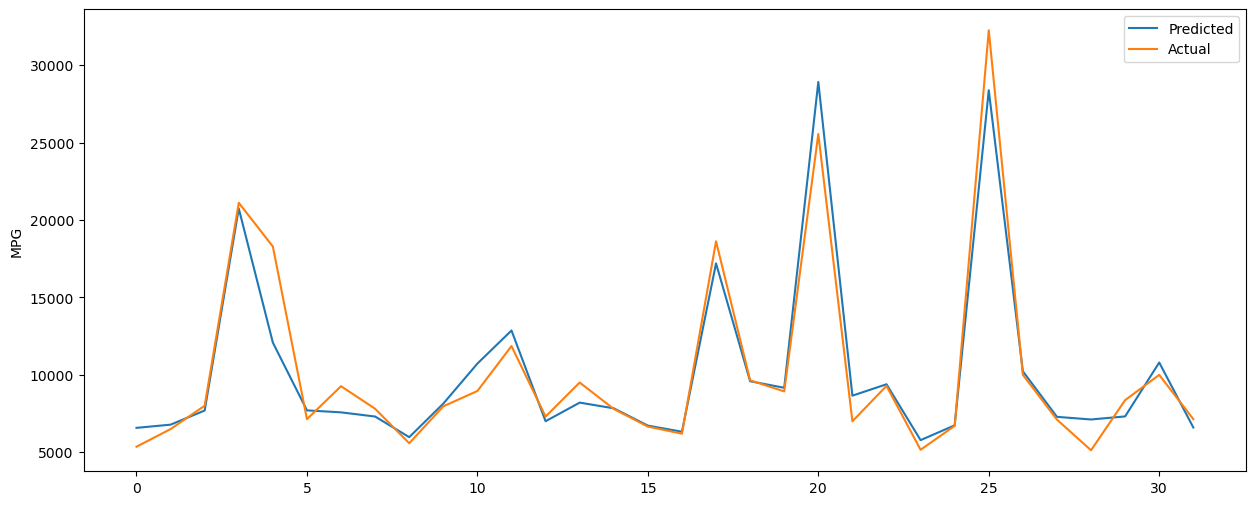

In [32]:
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('MPG')
plt.legend()
plt.show()

In [33]:
r_square = gbr_model.score(x_test, y_test)
r_square

0.9276270993684156

Грешката се намали во однос на првиот модел, што е добар резултат

In [34]:
gbr_model_mse = mean_squared_error(y_predict, y_test)
math.sqrt(gbr_model_mse)

1653.376556173746